# Masking out the face using Menpo!

Please follow the installation instructions from [here](http://www.menpo.org/installation/index.html) to install Menpo and it's dependencies.

In [2]:
%matplotlib inline
import urllib

import menpo.io as mio
import menpofit
import menpodetect

ImportError: No module named menpo.io

In [2]:
# Load some pre-trained models for facial landmark localisation and detection
face_fitter = menpofit.aam.load_balanced_frontal_face_fitter()
face_detector = menpodetect.dlib.load_dlib_frontal_face_detector()

In [3]:
# Download and save locally an image of Jennifer Lawrence
urllib.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Jennifer_Lawrence_SDCC_2015_X-Men.jpg/800px-Jennifer_Lawrence_SDCC_2015_X-Men.jpg',
                   'jennifer_lawrence.jpg')

('jennifer_lawrence.jpg', <httplib.HTTPMessage instance at 0x7f280ca81b48>)

In [4]:
# Load the image using Menpo
image = mio.import_image('jennifer_lawrence.jpg')

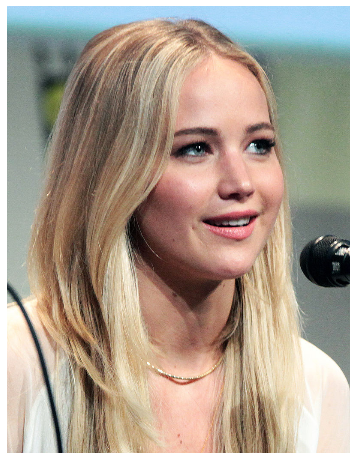

In [5]:
image.view_widget()

In [6]:
# Detect the face and make sure we only detected a single face!
bounding_boxes = face_detector(image)
print('Found {} faces'.format(len(bounding_boxes)))

Found 1 faces


In [7]:
# Find the facial landmarks
fitting_result = face_fitter.fit_from_bb(image, bounding_boxes[0])

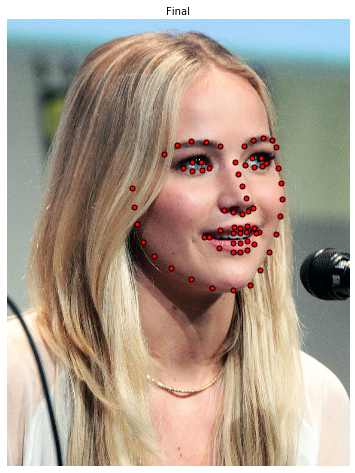

In [8]:
fitting_result.view_widget()

In [9]:
# Mask the image to the convex hull of those landmarks
image.landmarks['face'] = fitting_result.final_shape
masked_image = image.as_masked()
masked_image = masked_image.constrain_mask_to_landmarks(group='face')

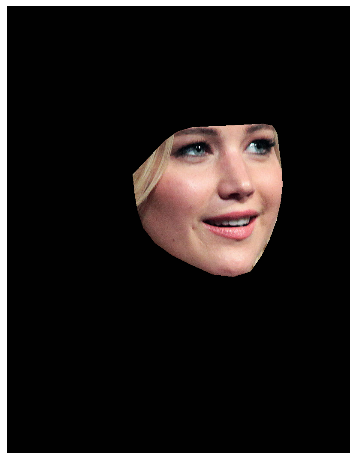

In [10]:
masked_image.view()

In [11]:
# Make the background white as requested
white_background_image = masked_image.as_unmasked(fill=1.)

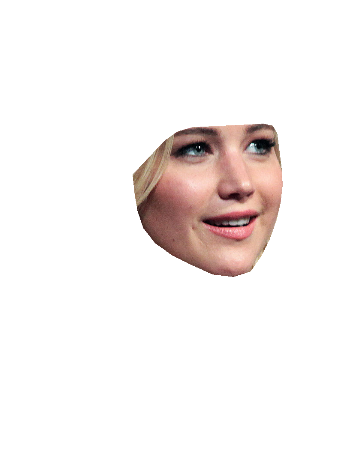

In [12]:
white_background_image.view()

In [13]:
# Save the result as a jpeg!
mio.export_image(white_background_image, 'jennifer_lawrence_masked.jpg', overwrite=True)